In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
vehicles = pd.read_csv("vehpub.csv")
households = pd.read_csv("hhpub.csv")

vehicles = vehicles.merge(households[['HOUSEID', 'CNTTDHH', 'CAR', 'PLACE', 'PRICE']], on='HOUSEID', how='left')
vehicles['VEHTYPE'] = vehicles['VEHTYPE'].replace(5, 4)

In [2]:
vehicles_type_df = vehicles[(vehicles['VEHTYPE'] > 0)
                            & (vehicles['VEHTYPE'] != 6)
                            & (vehicles['VEHTYPE'] != 97)
                            & (vehicles['HTPPOPDN'] != -9)
                            & (vehicles['CAR'] > 0)
                            & (vehicles['PRICE'] > 0)
                            & (vehicles['PLACE'] > 0)
                            & (vehicles['GSCOST'] != -9)
                            & (vehicles['URBAN'] != 4)]
vehicles_type_df.head()

,HOUSEID,VEHID,VEHYEAR,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,...,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF,CNTTDHH,CAR,PLACE,PRICE
0,30000007,1,2007,10,49,49032,1,1,3,69000,...,487.064221,1126.457778,30,-9,2.31275,1,6,1,2,1
1,30000007,2,2004,13,49,49442,1,2,-8,164000,...,250.899523,580.267873,19,-9,2.31275,1,6,1,2,1
2,30000007,3,1998,19,19,19014,1,1,1,120000,...,444.462475,1027.930589,18,-9,2.31275,1,6,1,2,1
3,30000007,4,1997,20,19,19021,1,1,2,-88,...,40.329575,93.272224,18,-9,2.31275,1,6,1,2,1
4,30000007,5,1993,24,20,20481,1,4,2,300000,...,888.404197,2054.656806,14,-9,2.31275,1,6,1,2,1


In [71]:
vehicles_type_df.loc[vehicles_type_df['VEHTYPE'] == 1, 'VEHTYPE'] = "Automobile"
vehicles_type_df.loc[vehicles_type_df['VEHTYPE'] == 2, 'VEHTYPE'] = "Van"
vehicles_type_df.loc[vehicles_type_df['VEHTYPE'] == 3, 'VEHTYPE'] = "SUV"
vehicles_type_df.loc[vehicles_type_df['VEHTYPE'] == 4, 'VEHTYPE'] = "Truck"
vehicles_type_df.loc[vehicles_type_df['VEHTYPE'] == 7, 'VEHTYPE'] = "Motorcycle"

C:\Users\jason\AppData\Local\Temp/ipykernel_27344/2713181658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_type_df.loc[vehicles_type_df['VEHTYPE'] == 1, 'VEHTYPE'] = "Automobile"


<AxesSubplot:title={'center':'distribution of vehicle type'}, ylabel='percentage'>

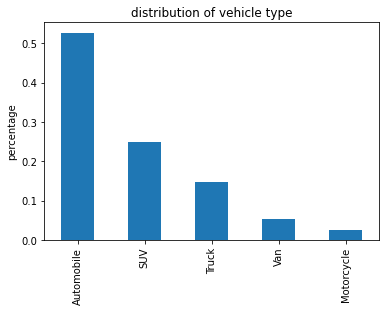

In [332]:
vehicles_type_df['VEHTYPE'].value_counts(normalize=True).plot.bar(title = 'distribution of vehicle type', ylabel = 'percentage')

FINAL INPUT VARIABLES:
CNTTDHH - Count of household trips on travel day
DRVRCNT - Number of drivers in household
HHFAMINC - Household income
HTPPOPDN - Category of population density(persons per square mile) in the census tract of the household's home location
HHSIZE - Household size
HHVEHCNT - Count of household vehicles

OTHER INPUT VARIABLES:
CAR - Frequency of Personal Vehicle Use for Travel
CDIVMSAR - Grouping of household bycombination of census division, MSA status, and presence of a subway system when population greater than 1 million
MSASIZE - Population size category of the Metropolitan Statistical Area(MSA), from the 2010-2014 five-year American Community Survey (ACS) API.
PLACE - Travel is a Financial Burden
PRICE - Price of Gasoline Affects Travel
URBAN - Household's urban area classification, based on home address and 2014 TIGER/LineShapefile

DEPENDENT VARIABLES:
FUELTYPE - Fuel Type
VEHAGE - Age of vehicle, based on model year
VEHTYPE - Vehicle Type

<AxesSubplot:title={'center':'Count of household trips on travel day vs vehicle type'}, xlabel='FUELTYPE'>

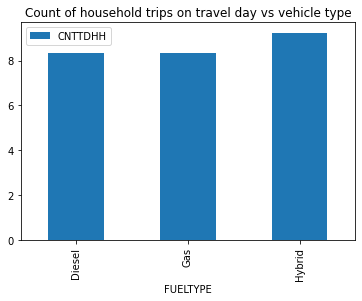

In [179]:
vehicles_type_df[['VEHTYPE', 'CNTTDHH']].groupby(['VEHTYPE']).mean().plot.bar(title = 'Count of household trips on travel day vs vehicle type')

<AxesSubplot:ylabel='Frequency'>

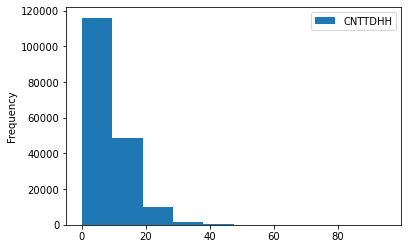

In [163]:
vehicles_type_df[['VEHTYPE', 'CNTTDHH']].groupby(['VEHTYPE']).plot.hist(legend = True)

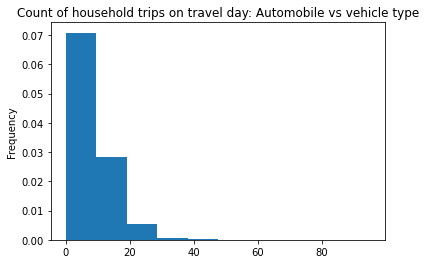

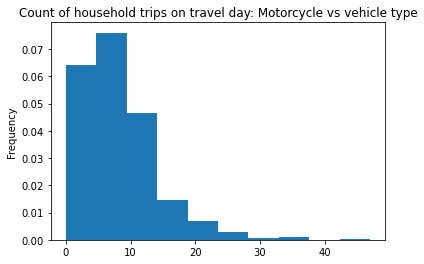

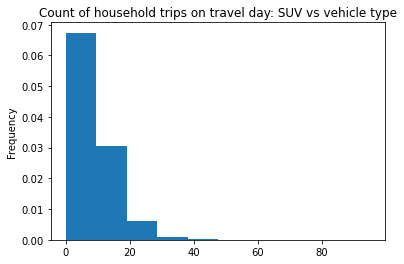

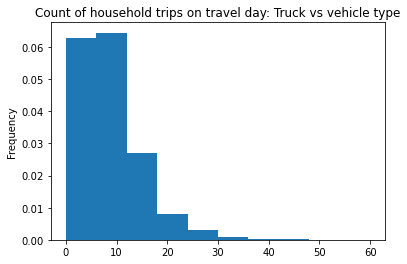

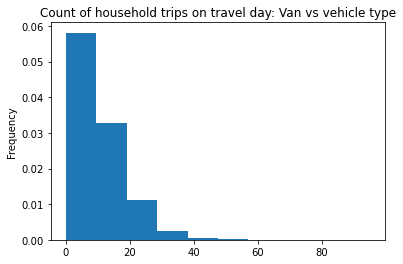

In [152]:


for title, group in vehicles_type_df[['VEHTYPE', 'CNTTDHH']].groupby(['VEHTYPE']):
    group.plot.hist(title="Count of household trips on travel day: "+title + ' vs vehicle type', density = True, legend=None)


<AxesSubplot:title={'center':'Number of drivers in household vs vehicle type'}, xlabel='VEHTYPE'>

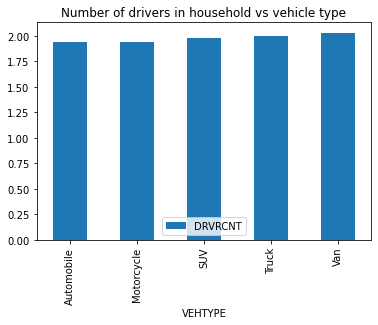

In [151]:
vehicles_type_df[['VEHTYPE', 'DRVRCNT']].groupby(['VEHTYPE']).mean().plot.bar(title = 'Number of drivers in household vs vehicle type')

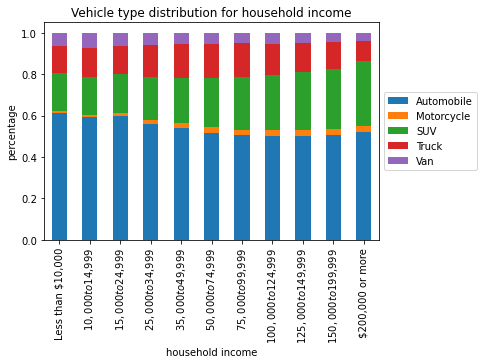

In [338]:
data = vehicles_type_df
temp = data.groupby(["HHFAMINC", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("HHFAMINC").apply(lambda x: x / float(x.sum())).unstack().drop([-9,-8,-7]).plot.bar(stacked = True, title = 'Vehicle type distribution for household income', xlabel = 'household income', ylabel ='percentage')

bars  = ['Less than $10,000', '$10,000 to $14,999','$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $199,999', '$200,000 or more']

y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylabel('Count of household')
plt.show() 
plt.show()

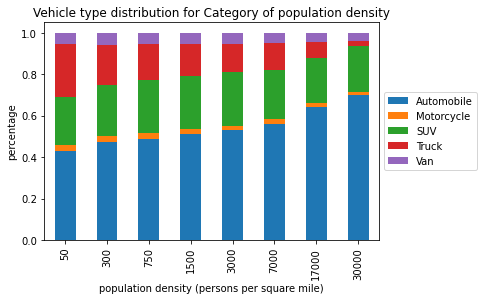

In [330]:
temp = data.groupby(["HTPPOPDN", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("HTPPOPDN").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True, title = 'Vehicle type distribution for Category of population density', ylabel = 'percentage', xlabel = 'population density (persons per square mile)')
plt.legend( loc='lower left')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylabel('Count of household')
plt.show() 
plt.show() 

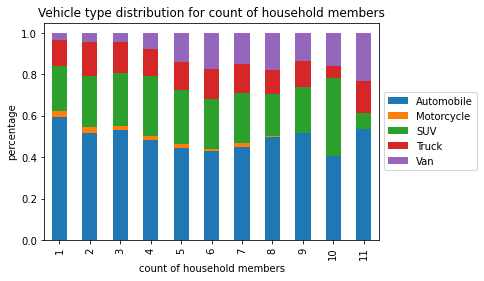

In [329]:
temp = data.groupby(["HHSIZE", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("HHSIZE").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True, title = 'Vehicle type distribution for count of household members' , ylabel = 'percentage', xlabel = 'count of household members')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylabel('Count of household')
plt.show() 

<AxesSubplot:title={'center':'Count of household vehicles vs vehicle type'}, xlabel='HHVEHCNT', ylabel='percentage'>

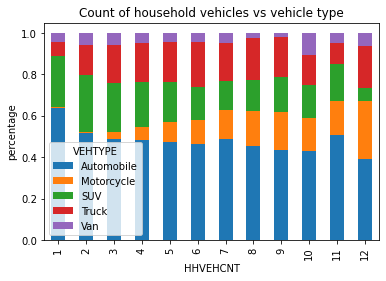

In [324]:

temp = data.groupby(["HHVEHCNT", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("HHVEHCNT").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True, title = 'Count of household vehicles vs vehicle type', ylabel = 'percentage')

In [164]:

vehicles_type_df.loc[vehicles_type_df['CAR'] == 1, 'CAR'] = "Daily"
vehicles_type_df.loc[vehicles_type_df['CAR'] == 2, 'CAR'] = "A few times a week "
vehicles_type_df.loc[vehicles_type_df['CAR'] == 3, 'CAR'] = "A few times a month"
vehicles_type_df.loc[vehicles_type_df['CAR'] == 4, 'CAR'] = "A few times a year"
vehicles_type_df.loc[vehicles_type_df['CAR'] == 5, 'CAR'] = "Never"


C:\Users\jason\AppData\Local\Temp/ipykernel_27344/3844805606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_type_df.loc[vehicles_type_df['CAR'] == 1, 'CAR'] = "Daily"


<AxesSubplot:title={'center':'Frequency of Personal Vehicle Use for Travel vs vehicle type'}>

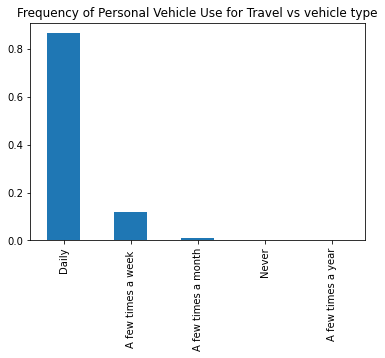

In [165]:
vehicles_type_df['CAR'].value_counts(normalize=True).plot.bar(title = 'Frequency of Personal Vehicle Use for Travel vs vehicle type')

In [ ]:
Population size category of the
Metropolitan Statistical Area

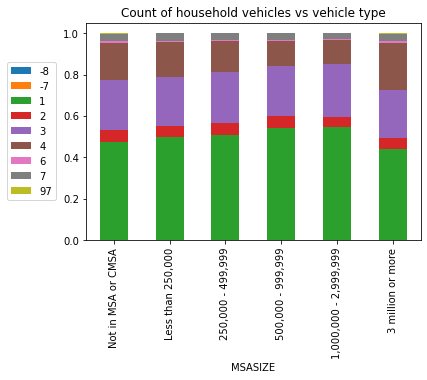

In [260]:
vehicles_type_df.loc[vehicles_type_df['MSASIZE'] == 1, 'MSASIZE'] = "Less than 250,000"
vehicles_type_df.loc[vehicles_type_df['MSASIZE'] == 2, 'MSASIZE'] = "250,000 - 499,999"
vehicles_type_df.loc[vehicles_type_df['MSASIZE'] == 3, 'MSASIZE'] = "500,000 - 999,999"
vehicles_type_df.loc[vehicles_type_df['MSASIZE'] == 4, 'MSASIZE'] = "1,000,000 - 2,999,999"
vehicles_type_df.loc[vehicles_type_df['MSASIZE'] == 5, 'MSASIZE'] = "3 million or more"
vehicles_type_df.loc[vehicles_type_df['MSASIZE'] == 6, 'MSASIZE'] = "Not in MSA or CMSA"

temp = data.groupby(["MSASIZE", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("MSASIZE").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True, title = 'Count of household vehicles vs vehicle type')

labels = ["Not in MSA or CMSA", "Less than 250,000", "250,000 - 499,999", "500,000 - 999,999", "1,000,000 - 2,999,999", "3 million or more"]
indexes = np.arange(len(labels))
plt.xticks(indexes, labels)
plt.legend(loc='center left', bbox_to_anchor=(-0.25, 0.5))
#plt.ylabel('Count of household')
plt.show() 

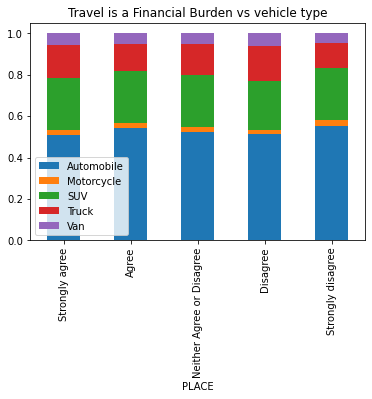

In [144]:

vehicles_type_df.loc[vehicles_type_df['PLACE'] == 1, 'PLACE'] = "Strongly agree"
vehicles_type_df.loc[vehicles_type_df['PLACE'] == 2, 'PLACE'] = "Agree"
vehicles_type_df.loc[vehicles_type_df['PLACE'] == 3, 'PLACE'] = "Neither Agree or Disagree"
vehicles_type_df.loc[vehicles_type_df['PLACE'] == 4, 'PLACE'] = "Disagree"
vehicles_type_df.loc[vehicles_type_df['PLACE'] == 5, 'PLACE'] = "Strongly disagree"

temp = data.groupby(["PLACE", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("PLACE").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True, title = 'Travel is a Financial Burden vs vehicle type')

labels = ["Strongly agree", 'Agree', "Neither Agree or Disagree", "Disagree", "Strongly disagree"]
indexes = np.arange(len(labels))
plt.xticks(indexes, labels)
plt.legend( loc='lower left')

plt.show() 

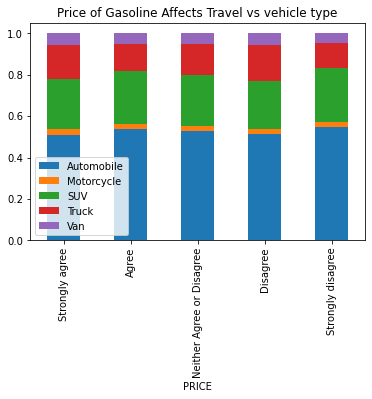

In [143]:


vehicles_type_df.loc[vehicles_type_df['PRICE'] == 1, 'PRICE'] = "Strongly agree"
vehicles_type_df.loc[vehicles_type_df['PRICE'] == 2, 'PRICE'] = "Agree"
vehicles_type_df.loc[vehicles_type_df['PRICE'] == 3, 'PRICE'] = "Neither Agree or Disagree"
vehicles_type_df.loc[vehicles_type_df['PRICE'] == 4, 'PRICE'] = "Disagree"
vehicles_type_df.loc[vehicles_type_df['PRICE'] == 5, 'PRICE'] = "Strongly disagree"

temp = data.groupby(["PRICE", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("PRICE").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True, title = 'Price of Gasoline Affects Travel vs vehicle type')

labels = ["Strongly agree", 'Agree', "Neither Agree or Disagree", "Disagree", "Strongly disagree"]
indexes = np.arange(len(labels))
plt.xticks(indexes, labels)
plt.legend( loc='lower left')

plt.show() 

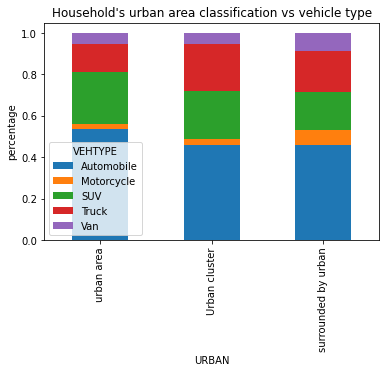

In [323]:
data = vehicles_type_df
temp = data.groupby(["URBAN", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("URBAN").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True, title = "Household's urban area classification vs vehicle type", ylabel = 'percentage')


bars = ('urban area', 'Urban cluster', 'surrounded by urban')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

In [334]:
vehicles_age_df = vehicles[(vehicles['VEHAGE'] < 40)
                           & (vehicles['VEHAGE'] > 0)
                           & (vehicles['HTPPOPDN'] != -9)
                           & (vehicles['HHFAMINC'] > 0)
                           & (vehicles['CAR'] > 0)
                           & (vehicles['PRICE'] > 0)
                           & (vehicles['PLACE'] > 0)
                           & (vehicles['URBAN'] != 4)]
'CAR', 'CNTTDHH', 'CDIVMSAR', 'GSCOST', 'HHSIZE', 'HHFAMINC', 'HHVEHCNT', 'PRICE'
data = vehicles_age_df

<AxesSubplot:title={'center':'Count of household trips on travel day vs vehicle age'}, xlabel='CNTTDHH'>

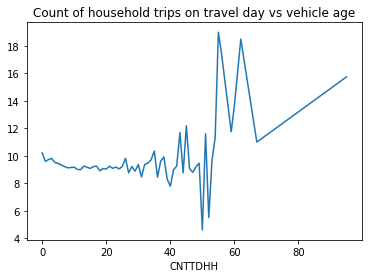

In [161]:
data.groupby(["CNTTDHH"]).mean()['VEHAGE'].plot(title = 'Count of household trips on travel day vs vehicle age')

<AxesSubplot:title={'center':'Vehicle age distribution for count of household member'}, xlabel='count of household member', ylabel='percentage'>

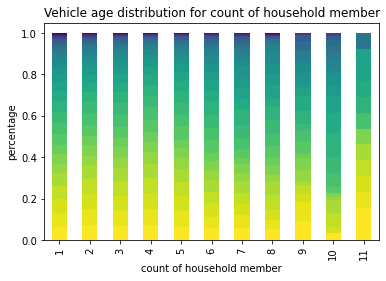

In [335]:
temp = data.groupby(["HHSIZE", "VEHAGE"]).count()["HOUSEID"]
temp.groupby("HHSIZE").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True, \
                                                                              color = plt.cm.viridis((np.linspace(1, 0, 32))), title = 'Vehicle age distribution for count of household member', legend = False, ylabel = 'percentage', xlabel = 'count of household member')


In [249]:
x = np.arange(11,0,-1)
# create an index for each tick position
xi = list(range(len(x)))
#np.linspace(1, 0, 11).reshape([1,11])
plt.imshow(np.linspace(1, 0, 32).reshape([32,1]))

x = np.arange(32,0,-1)
# create an index for each tick position
xi = list(range(len(x)))
#plt.yticks(xi, x)
plt.ylabel('Vehicle age')
plt.gca().invert_yaxis()
plt.show()

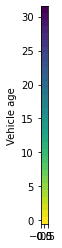

In [322]:
plt.imshow(np.linspace(1, 0, 32).reshape([32,1]))

x = np.arange(32,0,-1)
# create an index for each tick position
xi = list(range(len(x)))
#plt.yticks(xi, x)
plt.ylabel('Vehicle age')
plt.gca().invert_yaxis()
plt.show()

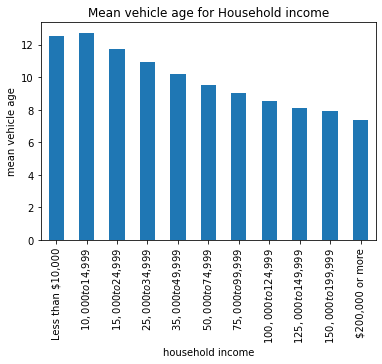

In [336]:
data.groupby(["HHFAMINC"]).mean()['VEHAGE'].plot.bar(title = 'Mean vehicle age for Household income', ylabel = 'mean vehicle age', xlabel = 'household income')
bars  = ['Less than $10,000', '$10,000 to $14,999','$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $199,999', '$200,000 or more']

y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.show()

<AxesSubplot:title={'center':'Mean vehicle age for count of household vehicles'}, xlabel='count of household vehicles', ylabel='mean vehicle age'>

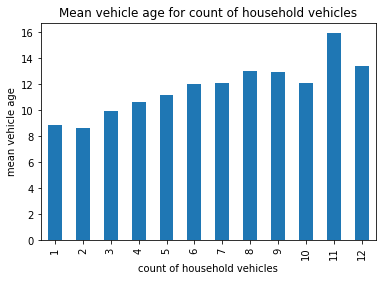

In [337]:
vehicles_age_df.groupby(["HHVEHCNT"]).mean()['VEHAGE'].plot.bar(title = 'Mean vehicle age for count of household vehicles', ylabel = 'mean vehicle age', xlabel = 'count of household vehicles')

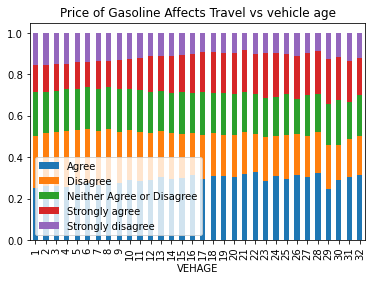

In [139]:
vehicles_age_df.loc[vehicles_age_df['PRICE'] == 1, 'PRICE'] = "Strongly agree"
vehicles_age_df.loc[vehicles_age_df['PRICE'] == 2, 'PRICE'] = "Agree"
vehicles_age_df.loc[vehicles_age_df['PRICE'] == 3, 'PRICE'] = "Neither Agree or Disagree"
vehicles_age_df.loc[vehicles_age_df['PRICE'] == 4, 'PRICE'] = "Disagree"
vehicles_age_df.loc[vehicles_age_df['PRICE'] == 5, 'PRICE'] = "Strongly disagree"
data = vehicles_age_df
temp = data.groupby(["VEHAGE", "PRICE"]).count()["HOUSEID"]
temp.groupby("VEHAGE").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True, title = 'Price of Gasoline Affects Travel vs vehicle age')
plt.legend( loc='lower left')

plt.show() 

<AxesSubplot:title={'center':'distribution of vehicle age'}, ylabel='Frequency'>

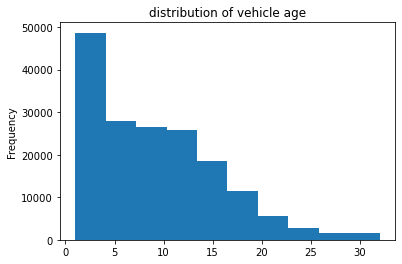

In [171]:
vehicles_age_df['VEHAGE'].plot.hist(title = 'distribution of vehicle age')

<AxesSubplot:title={'center':'Price of Gasoline Affects Travel vs vehicle age'}, xlabel='VEHAGE'>

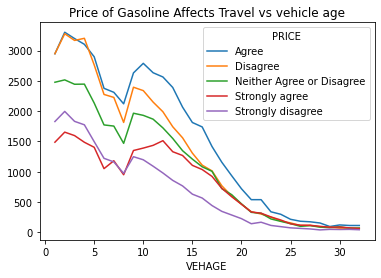

In [140]:
vehicles_age_df[['VEHAGE', 'PRICE']].groupby(['PRICE']).value_counts().unstack().T.plot(legend=True, title = 'Price of Gasoline Affects Travel vs vehicle age')

In [195]:
vehicles['FUELTYPE'] = vehicles['FUELTYPE'].replace(6, 4)
vehicles_fuel_df = vehicles[(vehicles['FUELTYPE'] > 0)
                            & (vehicles['FUELTYPE'] != 97)
                            & (vehicles['HTPPOPDN'] != -9)
                            & (vehicles['HHFAMINC'] > 0)
                            & (vehicles['CAR'] > 0)
                            & (vehicles['PRICE'] > 0)
                            & (vehicles['PLACE'] > 0)
                            & (vehicles['URBAN'] != 4)]

vehicles_fuel_df.loc[vehicles_fuel_df['FUELTYPE'] == 1, 'FUELTYPE'] = "Gas"
vehicles_fuel_df.loc[vehicles_fuel_df['FUELTYPE'] == 2, 'FUELTYPE'] = "Diesel"
vehicles_fuel_df.loc[vehicles_fuel_df['FUELTYPE'] == 3, 'FUELTYPE'] = "Hybrid/Electric"

C:\Users\jason\AppData\Local\Temp/ipykernel_27344/705717611.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_fuel_df.loc[vehicles_fuel_df['FUELTYPE'] == 1, 'FUELTYPE'] = "Gas"


<AxesSubplot:title={'center':'distribution of fuel type'}, xlabel='FUELTYPE', ylabel='count'>

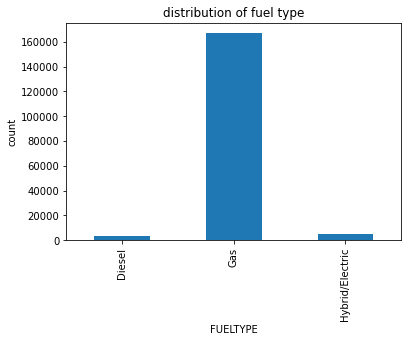

In [292]:
vehicles_fuel_df.groupby('FUELTYPE').count()['HOUSEID'].plot.bar(title = 'distribution of fuel type', ylabel = 'count')

Text(0.5, 1.0, '')

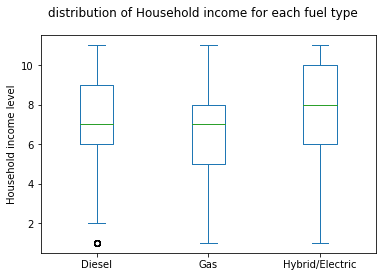

In [298]:
vehicles_fuel_df[['FUELTYPE', 'HHFAMINC']].plot.box('FUELTYPE', title = "distribution of Household income for each fuel type", ylabel = 'Household income level')
plt.title('')
#plt.suptitle('')